<h2><span style="color:green;">Task II</span></h2>
<i><h1><span style="color:purple;">Customers Data</span></h1></i>

Importing the necessary Python libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
customers = pd.read_excel(r'C:\Users\ECC\Digikala Jet Hiring Task\Task Data 1.xlsx', sheet_name=1)

In [3]:
customers.head()

,user_id,registeration_date,Registeration_month,first_order_month,Total Revenue,Total Discount,Total Orders,Date difference of First order & Last Order,Days passed after registration,Register days to first order,Acquisition Channel,Customer Acquisition Cost,Day from Last Order
0,4360659483,2022-09-25 15:23:02,140107,140107,2406160.0,1120000.0,1,0,315,0,Channel 1,400000,315
1,667397115,2021-11-17 11:30:25,140008,140008,3382000.0,0.0,1,0,627,0,Channel 2,0,627
2,1436340647,2022-02-02 12:44:42,140011,140011,3870680.0,1120000.0,1,0,550,0,Channel 3,400000,550
3,4405381938,2022-09-29 12:39:58,140107,140107,1957000.0,1120000.0,1,0,311,0,Channel 1,400000,311
4,3105640791,2022-06-10 11:09:56,140103,140103,35907868.2,4531100.0,14,301,422,0,Channel 3,400000,121


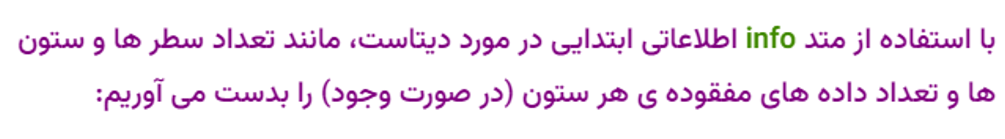

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   user_id                                      9000 non-null   int64         
 1   registeration_date                           9000 non-null   datetime64[ns]
 2   Registeration_month                          9000 non-null   int64         
 3   first_order_month                            9000 non-null   int64         
 4   Total Revenue                                9000 non-null   float64       
 5   Total Discount                               9000 non-null   float64       
 6   Total Orders                                 9000 non-null   int64         
 7   Date difference of First order & Last Order  9000 non-null   int64         
 8   Days passed after registration               9000 non-null   int64         
 9

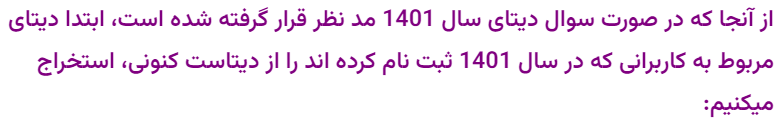

In [5]:
Registeration_year = customers.Registeration_month.apply(lambda m:int(str(m)[:4]))
customers.insert(2, 'Registeration_year', Registeration_year)
customers.Registeration_month = customers.Registeration_month.apply(lambda m:int(str(m)[4:]))

In [6]:
customers.head()

,user_id,registeration_date,Registeration_year,Registeration_month,first_order_month,Total Revenue,Total Discount,Total Orders,Date difference of First order & Last Order,Days passed after registration,Register days to first order,Acquisition Channel,Customer Acquisition Cost,Day from Last Order
0,4360659483,2022-09-25 15:23:02,1401,7,140107,2406160.0,1120000.0,1,0,315,0,Channel 1,400000,315
1,667397115,2021-11-17 11:30:25,1400,8,140008,3382000.0,0.0,1,0,627,0,Channel 2,0,627
2,1436340647,2022-02-02 12:44:42,1400,11,140011,3870680.0,1120000.0,1,0,550,0,Channel 3,400000,550
3,4405381938,2022-09-29 12:39:58,1401,7,140107,1957000.0,1120000.0,1,0,311,0,Channel 1,400000,311
4,3105640791,2022-06-10 11:09:56,1401,3,140103,35907868.2,4531100.0,14,301,422,0,Channel 3,400000,121


In [7]:
customers1401 = customers[customers.Registeration_year==1401]
customers1401 = customers1401.reset_index().drop('index', axis=1)
customers1401.head()

,user_id,registeration_date,Registeration_year,Registeration_month,first_order_month,Total Revenue,Total Discount,Total Orders,Date difference of First order & Last Order,Days passed after registration,Register days to first order,Acquisition Channel,Customer Acquisition Cost,Day from Last Order
0,4360659483,2022-09-25 15:23:02,1401,7,140107,2406160.0,1120000.0,1,0,315,0,Channel 1,400000,315
1,4405381938,2022-09-29 12:39:58,1401,7,140107,1957000.0,1120000.0,1,0,311,0,Channel 1,400000,311
2,3105640791,2022-06-10 11:09:56,1401,3,140103,35907868.2,4531100.0,14,301,422,0,Channel 3,400000,121
3,4151679925,2022-09-03 21:24:31,1401,6,140106,1520000.0,0.0,1,0,337,0,Channel 2,0,337
4,2205743887,2022-04-03 11:20:26,1401,1,140101,4636000.0,840000.0,1,0,490,8,Channel 5,300000,482


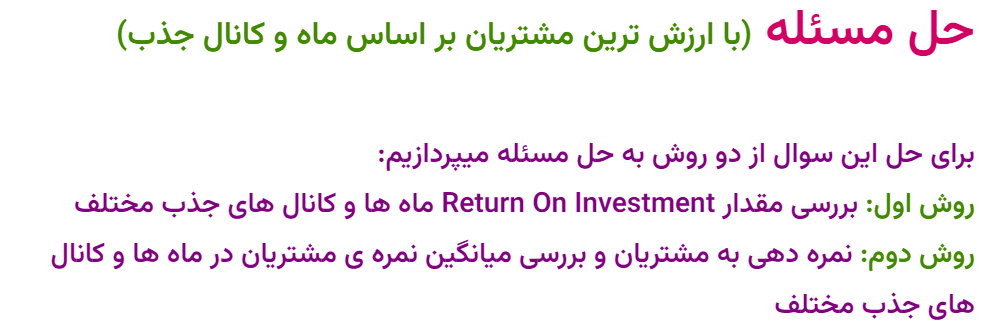

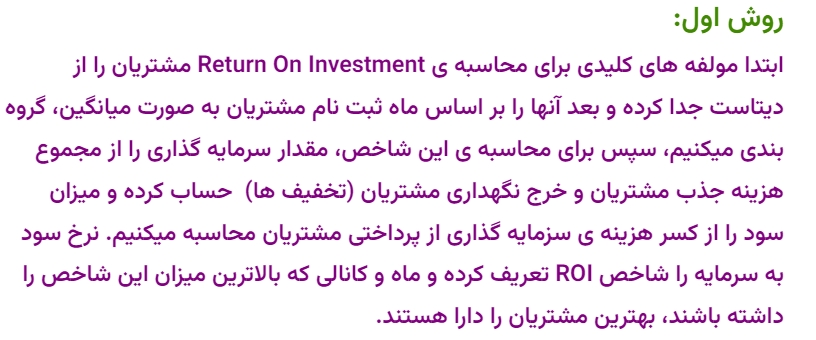

In [8]:
monthly_measures_1401 = customers1401.groupby('Registeration_month')[[
    'Total Revenue','Total Orders','Total Discount','Customer Acquisition Cost'
]].mean()

monthly_measures_1401

,Total Revenue,Total Orders,Total Discount,Customer Acquisition Cost
Registeration_month,,,,
1,3.167752e+07,12.594972,4.422581e+06,259497.206704
2,3.094616e+07,12.338667,4.594436e+06,258480.000000
3,3.017230e+07,11.743852,4.391324e+06,277602.459016
4,2.684828e+07,9.380090,2.440998e+06,186990.950226
5,4.558927e+07,13.622951,3.002069e+06,128142.076503
6,1.619530e+07,5.253197,2.101689e+06,250716.112532
7,1.078466e+07,3.425564,1.812359e+06,345518.796992
8,9.277580e+06,3.360849,1.748523e+06,337146.226415
9,1.612369e+07,3.817647,1.825897e+06,286352.941176


In [9]:
monthly_measures_1401[['Total Revenue']].sort_values('Total Revenue', ascending=False)

,Total Revenue
Registeration_month,
5,4.558927e+07
10,3.867276e+07
1,3.167752e+07
2,3.094616e+07
3,3.017230e+07
4,2.684828e+07
11,2.047842e+07
6,1.619530e+07
9,1.612369e+07


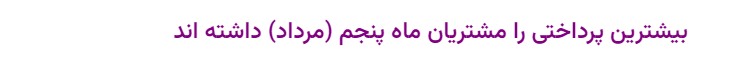

In [9]:
monthly_measures_1401[['Total Orders']].sort_values('Total Orders', ascending=False)

,Total Orders
Registeration_month,
5,13.622951
1,12.594972
2,12.338667
3,11.743852
4,9.380090
6,5.253197
10,4.951389
11,4.260870
9,3.817647


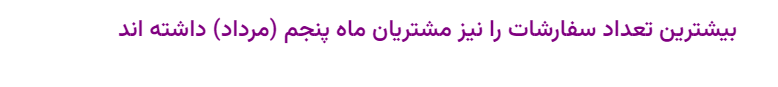

In [10]:
monthly_measures_1401[['Customer Acquisition Cost']].sort_values('Customer Acquisition Cost', ascending=False)

,Customer Acquisition Cost
Registeration_month,
7,345518.796992
8,337146.226415
9,286352.941176
12,281935.483871
3,277602.459016
11,275391.304348
1,259497.206704
2,258480.000000
10,256250.000000


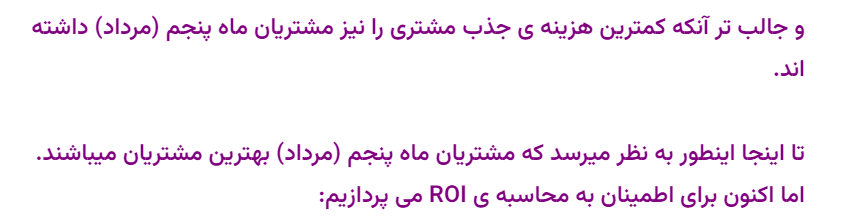

In [11]:
Investment = (monthly_measures_1401['Total Discount']+monthly_measures_1401['Customer Acquisition Cost'])
Profit = monthly_measures_1401['Total Revenue'] - Investment

monthly_measures_1401['ROI'] = Profit / Investment

monthly_measures_1401[['ROI']].sort_values('ROI', ascending=False)

,ROI
Registeration_month,
5,13.564283
4,9.216283
11,8.739324
10,8.427006
9,6.633422
6,5.884571
1,5.765696
3,5.462363
2,5.376818


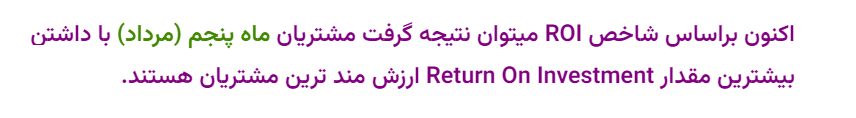

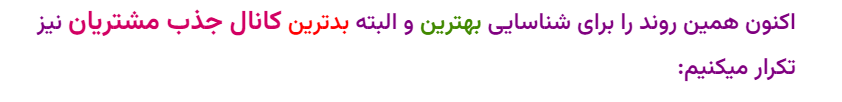

In [12]:
channel_measures_1401 = customers1401.groupby('Acquisition Channel')[[
    'Total Revenue','Total Orders','Total Discount','Customer Acquisition Cost'
]].mean()

channel_measures_1401

,Total Revenue,Total Orders,Total Discount,Customer Acquisition Cost
Acquisition Channel,,,,
Channel 1,9.101474e+06,2.669908,1.906249e+06,370291.762014
Channel 2,4.526300e+07,13.538372,2.396555e+06,0.000000
Channel 3,2.857398e+07,11.343358,4.986574e+06,337443.609023
Channel 4,1.254455e+07,5.333333,2.251435e+06,200000.000000
Channel 5,2.041768e+07,9.453988,3.790040e+06,282392.638037
Channel 6,2.020539e+07,7.888889,3.900296e+06,319444.444444
Channel 7,3.029873e+07,10.264706,3.575537e+06,330000.000000
Channel 8,1.367325e+07,6.631579,2.963861e+06,378947.368421
Channel 9,7.927480e+07,26.250000,1.917089e+07,362500.000000


In [13]:
channel_measures_1401[['Total Revenue']].sort_values('Total Revenue', ascending=False)

,Total Revenue
Acquisition Channel,
Channel 9,7.927480e+07
Channel 2,4.526300e+07
Channel 7,3.029873e+07
Channel 3,2.857398e+07
Channel 5,2.041768e+07
Channel 6,2.020539e+07
Channel 8,1.367325e+07
Channel 4,1.254455e+07
Channel 1,9.101474e+06


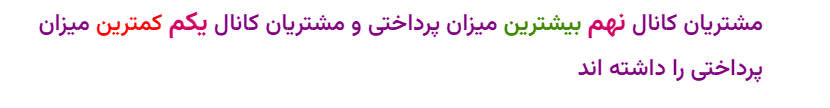

In [14]:
channel_measures_1401[['Total Orders']].sort_values('Total Orders', ascending=False)

,Total Orders
Acquisition Channel,
Channel 9,26.250000
Channel 2,13.538372
Channel 3,11.343358
Channel 7,10.264706
Channel 5,9.453988
Channel 6,7.888889
Channel 8,6.631579
Channel 4,5.333333
Channel 1,2.669908


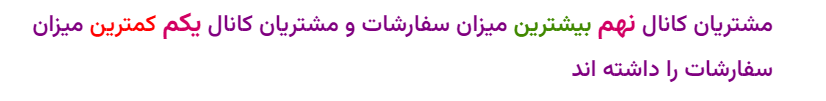

In [17]:
channel_measures_1401[['Customer Acquisition Cost']].sort_values('Customer Acquisition Cost', ascending=False)

,Customer Acquisition Cost
Acquisition Channel,
Channel 8,378947.368421
Channel 1,370291.762014
Channel 9,362500.000000
Channel 3,337443.609023
Channel 7,330000.000000
Channel 6,319444.444444
Channel 5,282392.638037
Channel 4,200000.000000
Channel 2,0.000000


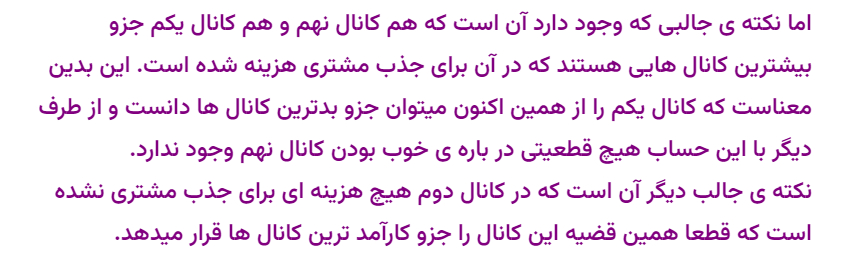

In [18]:
channel_measures_1401[['Total Discount']].sort_values('Total Discount', ascending=False)

,Total Discount
Acquisition Channel,
Channel 9,1.917089e+07
Channel 3,4.986574e+06
Channel 6,3.900296e+06
Channel 5,3.790040e+06
Channel 7,3.575537e+06
Channel 8,2.963861e+06
Channel 2,2.396555e+06
Channel 4,2.251435e+06
Channel 1,1.906249e+06


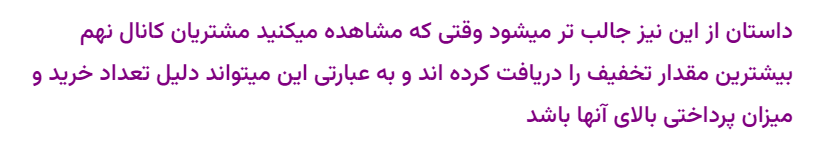

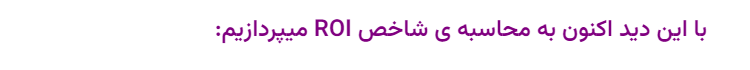

In [19]:
Investment = (channel_measures_1401['Total Discount']+channel_measures_1401['Customer Acquisition Cost'])
Profit = channel_measures_1401['Total Revenue'] - Investment

channel_measures_1401['ROI'] = Profit / Investment

channel_measures_1401[['ROI']].sort_values('ROI', ascending=False)

,ROI
Acquisition Channel,
Channel 2,17.886694
Channel 7,6.757891
Channel 3,4.366995
Channel 4,4.117228
Channel 5,4.013633
Channel 6,3.788301
Channel 8,3.090347
Channel 9,3.058425
Channel 1,2.997940


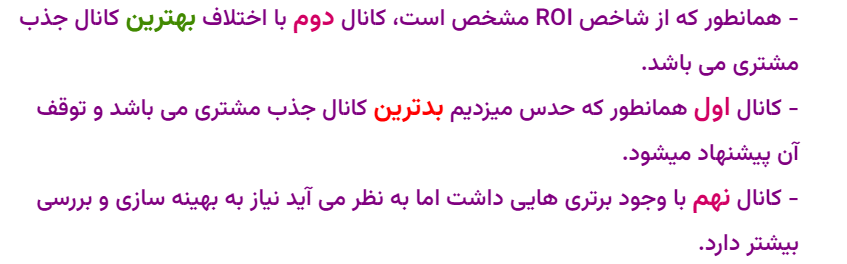

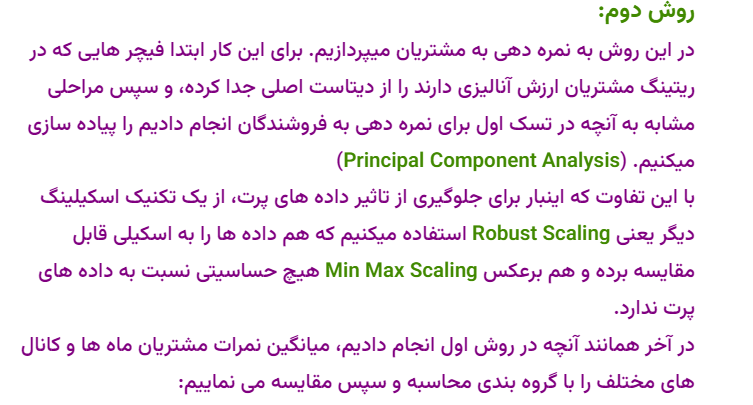

In [20]:
customers_rating = customers1401.iloc[:,3:].drop('first_order_month', axis=1)
customers_rating.insert(1, 'Acquisition_Channel', customers1401['Acquisition Channel'])
customers_rating.drop(['Acquisition Channel', 'Days passed after registration', ], axis=1, inplace=True)

In [21]:
customers_rating.head()

,Registeration_month,Acquisition_Channel,Total Revenue,Total Discount,Total Orders,Date difference of First order & Last Order,Register days to first order,Customer Acquisition Cost,Day from Last Order
0,7,Channel 1,2406160.0,1120000.0,1,0,0,400000,315
1,7,Channel 1,1957000.0,1120000.0,1,0,0,400000,311
2,3,Channel 3,35907868.2,4531100.0,14,301,0,400000,121
3,6,Channel 2,1520000.0,0.0,1,0,0,0,337
4,1,Channel 5,4636000.0,840000.0,1,0,8,300000,482


In [22]:
customers_rating.iloc[:,2:] = RobustScaler().fit_transform(customers_rating.iloc[:,2:])
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(customers_rating.iloc[:,2:])
principalDf = pd.DataFrame(
    principalComponents,
    columns =['PC ' + str(i) for i in range(1, principalComponents.shape[1]+1)],
    index=range(0,customers_rating.shape[0])
)

loadings = pca.components_
feature_importance = np.abs(loadings).sum(axis=0) / np.sum(np.abs(loadings))

customers_rating['Total Discount'] = 1 - customers_rating['Total Discount']
customers_rating['Register days to first order'] = 1 - customers_rating['Register days to first order']
customers_rating['Customer Acquisition Cost'] = 1 - customers_rating['Customer Acquisition Cost']
customers_rating['Day from Last Order'] = 1 - customers_rating['Day from Last Order']

# Creating a column in "customers_rating" dedicated to "Weighted Scores"
customers_rating['Weighted Score'] = np.dot(customers_rating.iloc[:,2:].values, feature_importance)
customers_rating.head()

,Registeration_month,Acquisition_Channel,Total Revenue,Total Discount,Total Orders,Date difference of First order & Last Order,Register days to first order,Customer Acquisition Cost,Day from Last Order,Weighted Score
0,7,Channel 1,-0.198369,1.000000,0.0,0.000000,1.000000,0.6,0.829787,0.410311
1,7,Channel 1,-0.228020,1.000000,0.0,0.000000,1.000000,0.6,0.858156,0.409830
2,3,Channel 3,2.013154,-1.230819,2.6,3.670732,1.000000,0.6,2.205674,1.651172
3,6,Channel 2,-0.256867,1.732467,0.0,0.000000,1.000000,2.2,0.673759,0.672145
4,1,Channel 5,-0.051173,1.183117,0.0,0.000000,-0.142857,1.0,-0.354610,0.216895


In [23]:
month_measure_rating = customers_rating.groupby('Registeration_month')[['Weighted Score']].mean()
month_measure_rating.sort_values('Weighted Score', ascending=False)

,Weighted Score
Registeration_month,
5,1.174736
11,0.839883
10,0.737094
3,0.734984
4,0.699597
1,0.673982
9,0.636450
6,0.628217
2,0.607376


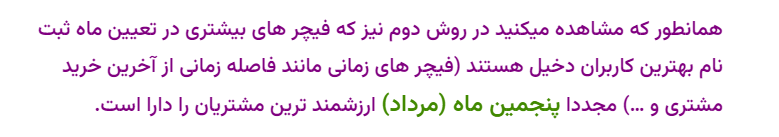

In [24]:
channel_measure_rating = customers_rating.groupby('Acquisition_Channel')[['Weighted Score']].mean()
channel_measure_rating.sort_values('Weighted Score', ascending=False)

,Weighted Score
Acquisition_Channel,
Channel 2,1.195285
Channel 5,0.767827
Channel 7,0.667809
Channel 4,0.656590
Channel 3,0.630557
Channel 6,0.610206
Channel 1,0.415960
Channel 9,0.282917
Channel 8,0.235952


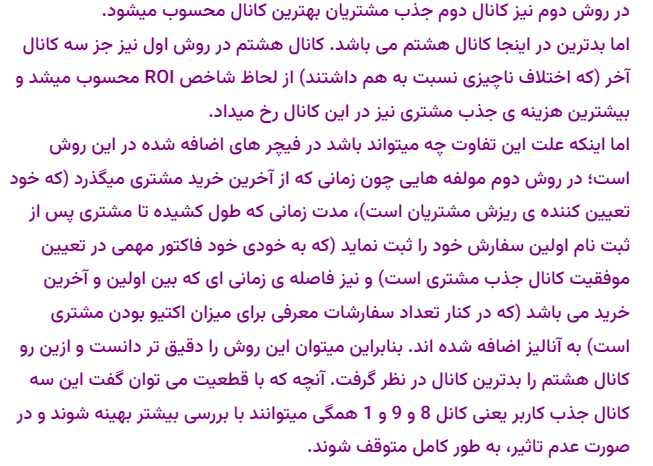

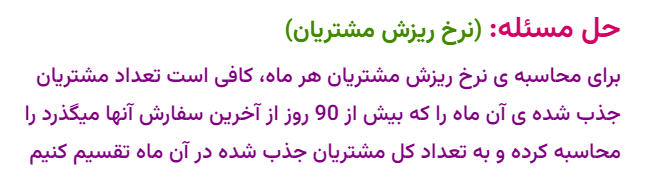

In [52]:
churn = customers1401[customers1401['Day from Last Order']>90].groupby('Registeration_month')[['user_id']]\
.count().rename(columns={'user_id':'Churned Users'})

Total_Users = customers1401.groupby('Registeration_month')[['user_id']]\
.count().rename(columns={'user_id':'Total Aqcuised Users'})

churn = churn.join(Total_Users)
churn['Churn Rate']=churn['Churned Users']/churn['Total Aqcuised Users']

In [55]:
churn.sort_values(by='Churn Rate', ascending=False)

,Churned Users,Total Aqcuised Users,Churn Rate
Registeration_month,,,
7,632,665,0.950376
8,387,424,0.912736
6,349,391,0.892583
4,389,442,0.880090
9,147,170,0.864706
1,297,358,0.829609
3,404,488,0.827869
10,117,144,0.812500
2,302,375,0.805333


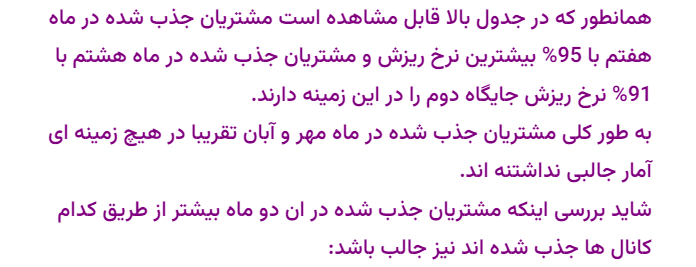

In [64]:
customers1401[(customers1401['Registeration_month']==7)|(customers1401['Registeration_month']==8)][['Acquisition Channel']]\
.value_counts().to_frame().rename(columns={0:'Count'})

,Count
Acquisition Channel,
Channel 1,924
Channel 2,122
Channel 3,15
Channel 8,7
Channel 9,7
Channel 5,5
Channel 7,5
Channel 4,4
